In [1]:
# Autorzy: Mariusz Czarny, Marta, 

In [2]:
'''
Zrodlo danych: https://finance.yahoo.com/quote/%5EGSPC/history?p=%5EGSPC

1.) Jak zmianiały się ceny akcji na przełomie czasu?
2.) Jaki był średni dzienny zwrot akcji?
3.) Jaka była średnia krocząca różnych akcji?
4.) Jaka była korelacja między cenami zamknięcia poszczególnych akcji?
4.) Jaka była korelacja między dziennymi zwrotami poszczególnych akcji?
5.) Jaką wartość narażamy inwestując w określone akcje?
6.) Jak możemy próbować przewidzieć przyszłe notowania akcji?
'''

'\n1.) Jak zmianiały się ceny akcji na przełomie czasu?\n2.) Jaki był średni dzienny zwrot akcji?\n3.) Jaka była średnia krocząca różnych akcji?\n4.) Jaka była korelacja między cenami zamknięcia poszczególnych akcji?\n4.) Jaka była korelacja między dziennymi zwrotami poszczególnych akcji?\n5.) Jaką wartość narażamy inwestując w określone akcje?\n6.) Jak możemy próbować przewidzieć przyszłe notowania akcji?\n'

In [75]:
#Import bibliotek
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

# Wizualizacja
import matplotlib.pyplot as plt

In [76]:
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [77]:
# Timestamp
from datetime import datetime

# For division
#from __future__ import division

In [78]:
#import external pandas_datareader library with alias of web
import pandas_datareader as web
 
#Data
from datetime import datetime
 
#początkowa i końcowa data pobieranych danych o akcjach
start = datetime(2017, 1, 1)
end = datetime(2017, 12, 31)
 
#Sciaganie danych z yahoo
kghmDF = web.DataReader("KGHA.F", 'yahoo', start, end)
gazpromDF = web.DataReader("OGZPY", 'yahoo', start, end)
generalElectric = web.DataReader("GE", 'yahoo', start, end) 
 
#kghmDF.to_csv('kghm.csv')
#gazpromDF.to_csv('gazprom.csv')
#generalElectric.to_csv('ge.csv')
#kghmDF = pd.read_csv('kghm.csv');

In [79]:
kghmDF.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-02,20.000000,21.141001,20.000000,21.141001,20.727007,1435
2017-01-03,19.886999,19.886999,19.886999,19.886999,19.497562,0
2017-01-04,20.398001,21.465000,20.398001,21.465000,21.044662,80
2017-01-05,20.895000,20.895000,20.895000,20.895000,20.485825,0
2017-01-06,21.000000,21.000000,21.000000,21.000000,20.588768,0


In [80]:
kghmDF.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 255 entries, 2017-01-02 to 2017-12-29
Data columns (total 6 columns):
Open         255 non-null float64
High         255 non-null float64
Low          255 non-null float64
Close        255 non-null float64
Adj Close    255 non-null float64
Volume       255 non-null int64
dtypes: float64(5), int64(1)
memory usage: 13.9 KB


In [81]:
kghmDF.describe()

,Open,High,Low,Close,Adj Close,Volume
count,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000
mean,27.139761,27.531824,27.073263,27.424537,27.142741,267.662745
std,1.888948,1.941378,1.897404,1.935648,1.963432,513.677344
min,19.886999,19.886999,19.886999,19.886999,19.497562,0.000000
25%,26.160501,26.278500,26.036001,26.199500,25.882042,0.000000
50%,27.513000,27.849001,27.445000,27.702999,27.451691,56.000000
75%,28.510999,28.815500,28.494000,28.698501,28.589928,300.000000
max,30.716999,31.759001,30.716999,31.759001,31.137079,4137.000000


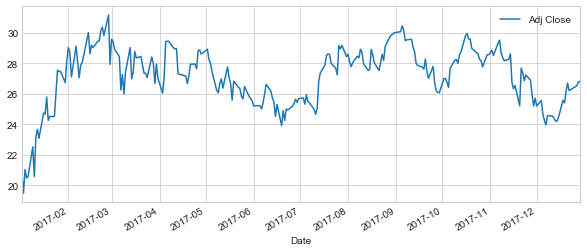

In [82]:
# Let's see a historical view of the closing price
kghmDF['Adj Close'].plot(legend=True,figsize=(10,4))

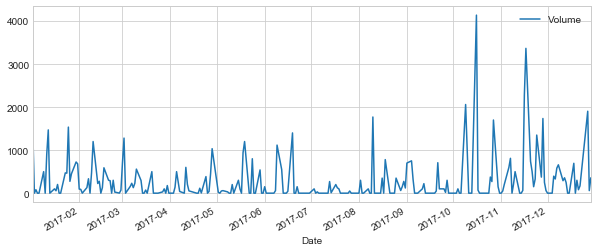

In [83]:
# Now let's plot the total volume of stock being traded each day over the past 5 years
kghmDF['Volume'].plot(legend=True,figsize=(10,4))

In [84]:
# Srednia ruchoma
movingAvarages = [7,30,60,90]

for avarage in movingAvarages:
    column_name = "MA for %s days" %(str(avarage))
    kghmDF[column_name]=kghmDF['Adj Close'].rolling(window=avarage).mean()

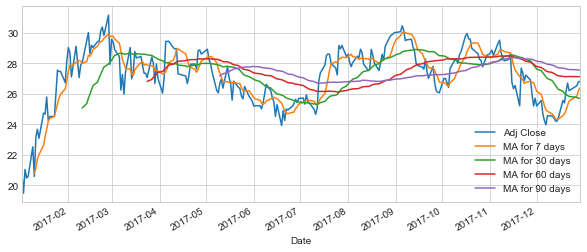

In [85]:
kghmDF[['Adj Close','MA for 7 days','MA for 30 days','MA for 60 days','MA for 90 days']].plot(subplots=False,figsize=(10,4))

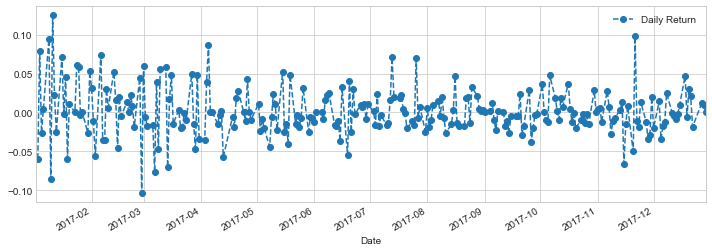

In [86]:
# pct_change - wyszukuje procentową zmianę dla każdego dnia
kghmDF['Daily Return'] = kghmDF['Adj Close'].pct_change()
# Procentowy dzienny zwrot
kghmDF['Daily Return'].plot(figsize=(12,4),legend=True,linestyle='--',marker='o')

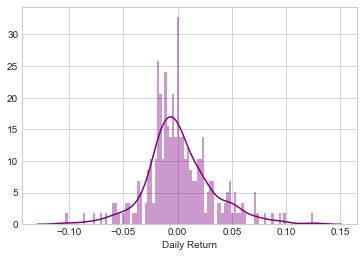

In [87]:
sns.distplot(kghmDF['Daily Return'].dropna(),bins=100,color='purple')

In [88]:
closing_df = web.DataReader(['KGHA.F','OGZPY','GE','STO'],'yahoo',start,end)['Adj Close']

In [89]:
closing_df.head()

,GE,KGHA.F,OGZPY,STO
Date,,,,
2017-01-02,NaN,20.727007,NaN,NaN
2017-01-03,30.867821,19.497562,4.455182,17.966433
2017-01-04,30.877563,21.044662,4.542027,17.918163
2017-01-05,30.702230,20.485825,4.498604,18.313984
2017-01-06,30.789896,20.588768,4.498604,18.188482


In [90]:
tech_rets = closing_df.pct_change()

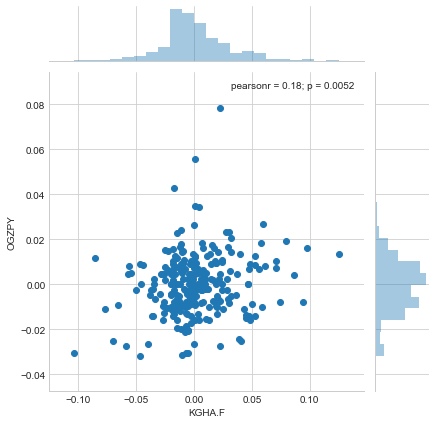

In [91]:
# jointplot porówna dzienny zwrot dla KGHM i Gazpromu
sns.jointplot('KGHA.F','OGZPY',tech_rets,kind='scatter')

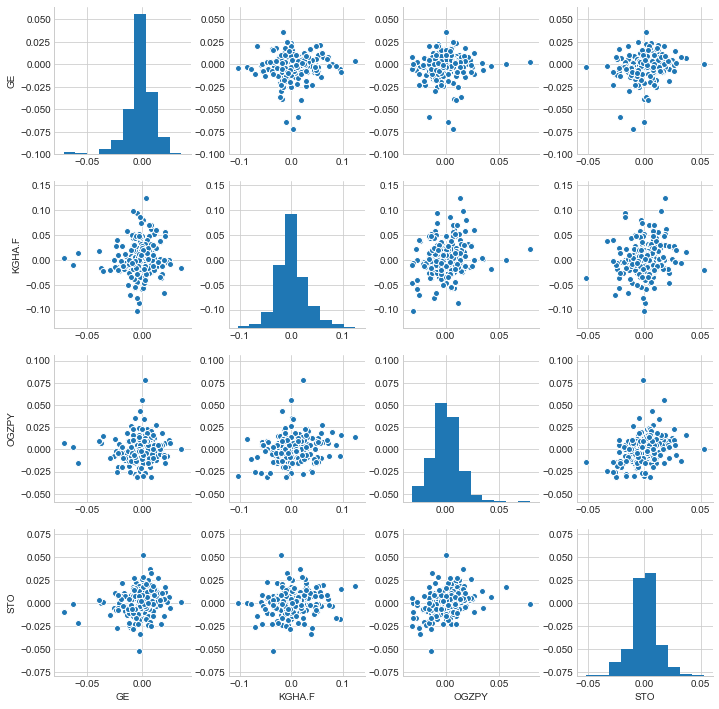

In [74]:
# wykres szybkiej korelacji dla codziennych zwrotów
from IPython.display import SVG
sns.pairplot(tech_rets.dropna())